<a href="https://colab.research.google.com/github/sarisppp/PJ63_CE18/blob/master/ML_model_RandomForest5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ทำการ import Envoloment แล้ว โหลดข้อมูล**

In [53]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import MinMaxScaler


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
used_features = ['Timestamp','SET50.Close','EMAV(34)','RSI(14)','EMAV(RSI,13)','MACD(13,5,5)','Signal']
data = pd.read_excel("/content/drive/My Drive/Set50_20190314_20200820_1minute.xlsx",usecols =used_features)
data.set_index("Timestamp",inplace=True)
data=data.dropna()


**** ฟังชั่นเตรียมข้อมูลสำหรับการ train****

In [55]:
def signal(data,periods=16):
  data['output']=0
  for index,row in data.iterrows():
    if row['MACD(13,5,5)']>row['Signal']+(row['Signal']*0.2) and row['RSI(14)']>row['EMAV(RSI,13)']+(row['EMAV(RSI,13)']*0.2):
      if row['SET50.Close']>row['EMAV(34)']:
        signalPre=1
      else:
        signalPre=0
    elif row['MACD(13,5,5)']<row['Signal']-(row['Signal']*0.2) and row['RSI(14)']<row['EMAV(RSI,13)']-(row['EMAV(RSI,13)']*0.2):
      if row['SET50.Close']<row['EMAV(34)']:
        signalPre=-1
      else:
        signalPre=0
    else:
      signalPre=0
    data.at[index,'output']= signalPre
    
     
  return data

**นำข้อมูลเข้าฟังชั่น**

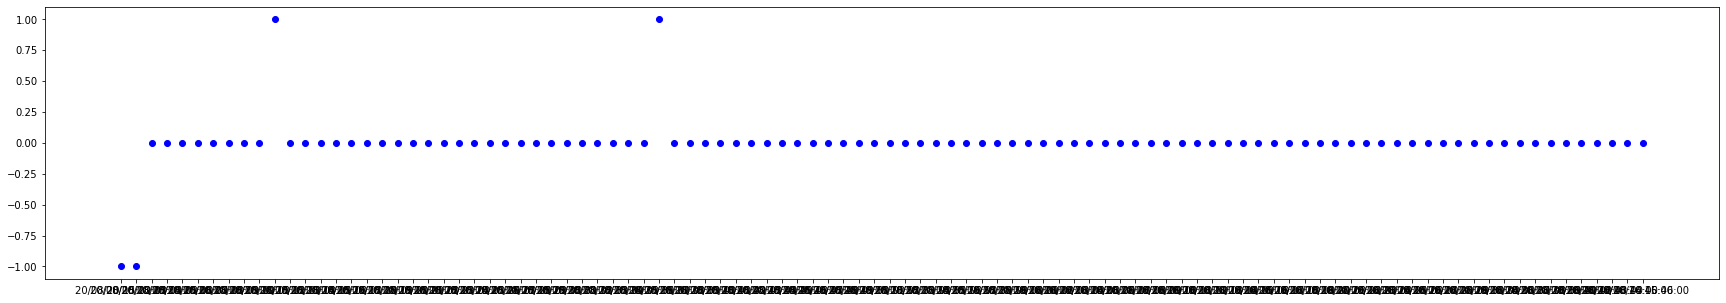

Close - EMAV


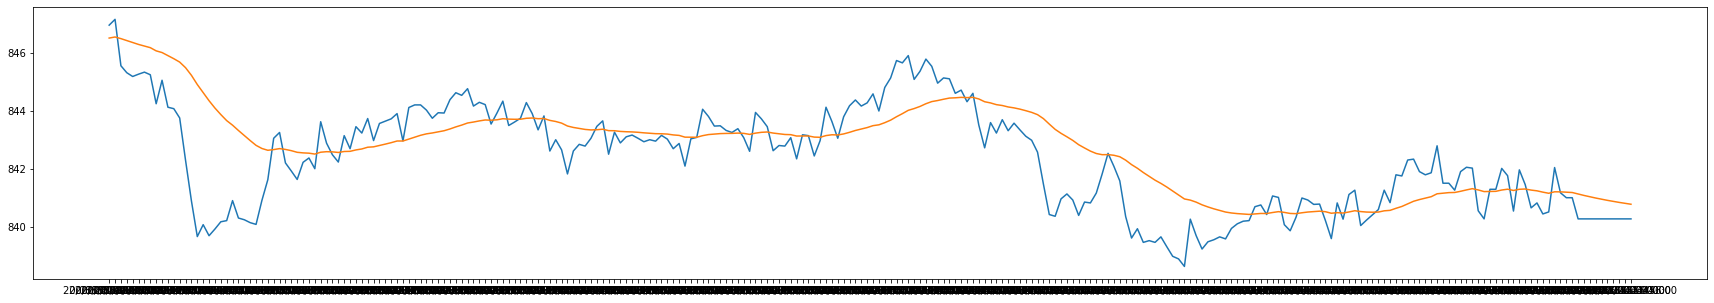

In [56]:
data_new=data
data_new=signal(data_new)
data_new.tail(50)
plt.figure(figsize=(30,5))
plt.plot(data_new['output'].tail(100),'bo')
plt.show()
print("Close - EMAV")
plt.figure(figsize=(30,5))
plt.plot(data_new['SET50.Close'].tail(260))
plt.plot(data_new['EMAV(34)'].tail(260),data="EMAV")
plt.show() 

**clean data**

In [57]:
data_new=data_new.dropna()
data_X = data_new.drop('output',axis=1)
data_Y = data_new.output

**Model กับ split ข้อมูล แล้ว Train**

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.20, random_state=0)
print(train_X.info())
print("=====================================")
print(train_y.head())
RandomForest = RandomForestClassifier(n_estimators=100)
RandomForest.fit(train_X, train_y)

<class 'pandas.core.frame.DataFrame'>
Index: 44709 entries, 22/05/20 12:21:00 to 13/09/19 14:51:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SET50.Close   44709 non-null  float64
 1   EMAV(34)      44709 non-null  float64
 2   RSI(14)       44709 non-null  float64
 3   MACD(13,5,5)  44709 non-null  float64
 4   Signal        44709 non-null  object 
 5   EMAV(RSI,13)  44709 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.4+ MB
None
Timestamp
22/05/20 12:21:00      0
2020-05-08 15:27:00    0
24/10/19 12:27:00      0
23/12/19 16:01:00     -1
2020-03-03 16:35:00   -1
Name: output, dtype: int64


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**รายงานผลการ Test**

In [59]:
y_predict=RandomForest.predict(test_X)

from sklearn.metrics import classification_report 
report = classification_report(test_y,y_predict)
print(report)

              precision    recall  f1-score   support

          -1       0.96      0.90      0.93       409
           0       0.99      1.00      0.99     10519
           1       0.94      0.84      0.89       250

    accuracy                           0.99     11178
   macro avg       0.96      0.91      0.94     11178
weighted avg       0.99      0.99      0.99     11178



**โหลดข้อมูลใหม่เพื่อ นำมา predict**

In [60]:
used_features = ['Timestamp','SET50.Close','EMAV(34)','RSI(14)','EMAV(RSI,13)','MACD(13,5,5)','Signal']
data = pd.read_excel("/content/drive/My Drive/Set50_20190314_20200820_1minute.xlsx",usecols =used_features)
data.set_index("Timestamp",inplace=True)
data.isnull().sum()
import time

In [61]:
data=data.dropna()
data_predict=RandomForest.predict(data)
data['signal_predict']=data_predict
data.head()

,SET50.Close,EMAV(34),RSI(14),"MACD(13,5,5)",Signal,"EMAV(RSI,13)",signal_predict
Timestamp,,,,,,,
13/03/19 14:59:00,1081.74,1081.6691,49.0514,0.0831,0.2186,53.734,0
13/03/19 15:00:00,1082.10,1081.6937,52.0825,0.0583,0.1652,53.498,0
13/03/19 15:01:00,1081.04,1081.6564,43.8165,-0.1605,0.0566,52.115,0
13/03/19 15:02:00,1082.73,1081.7177,55.8480,0.0440,0.0524,52.648,0
13/03/19 15:03:00,1082.66,1081.7716,55.3196,0.1454,0.0834,53.030,0


**นำ ข้อมูล predict มาเทียบกับ ข้อมูลที่มีผลลัพท์อยู่แล้ว signal กับ signal_pre**

In [62]:
data=signal(data)
data.head(15)

,SET50.Close,EMAV(34),RSI(14),"MACD(13,5,5)",Signal,"EMAV(RSI,13)",signal_predict,output
Timestamp,,,,,,,,
13/03/19 14:59:00,1081.74,1081.6691,49.0514,0.0831,0.2186,53.734,0,0
13/03/19 15:00:00,1082.10,1081.6937,52.0825,0.0583,0.1652,53.498,0,0
13/03/19 15:01:00,1081.04,1081.6564,43.8165,-0.1605,0.0566,52.115,0,0
13/03/19 15:02:00,1082.73,1081.7177,55.8480,0.0440,0.0524,52.648,0,0
13/03/19 15:03:00,1082.66,1081.7716,55.3196,0.1454,0.0834,53.030,0,0
13/03/19 15:04:00,1082.41,1081.8081,53.3771,0.1488,0.1052,53.080,0,0
13/03/19 15:05:00,1082.61,1081.8539,54.7461,0.1818,0.1308,53.318,0,0
13/03/19 15:06:00,1082.49,1081.8902,53.7267,0.1691,0.1435,53.376,0,0
13/03/19 15:07:00,1082.33,1081.9154,52.3277,0.1233,0.1368,53.226,0,0


**plot กราฟ สัญญาณการ ซื้้อขาย แต่ ละ ช่วงเวลา 30 ข้อมูล**

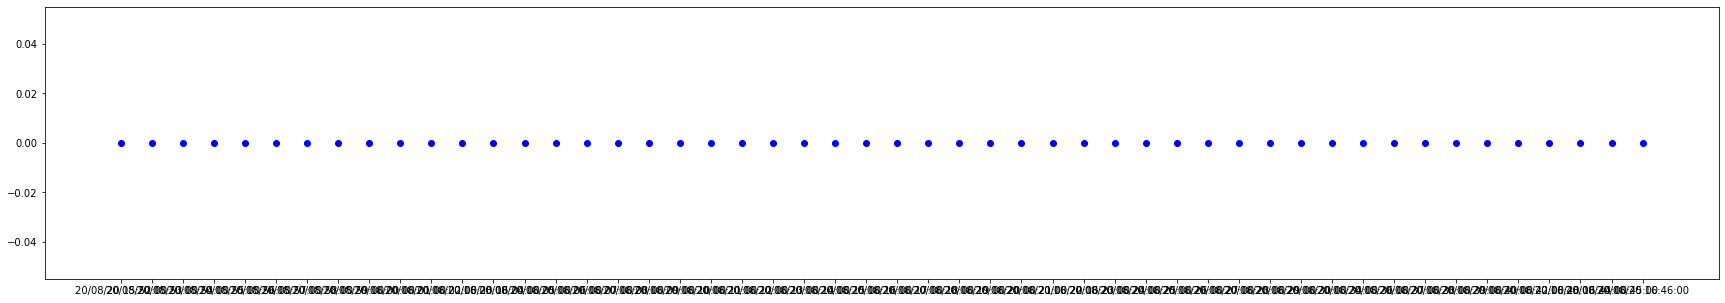

Close - EMAV


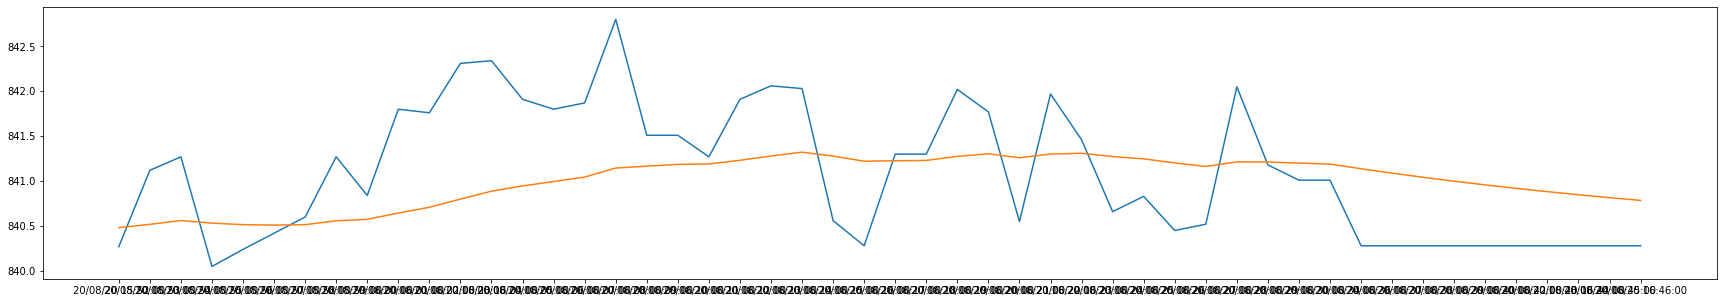

In [63]:
plt.figure(figsize=(30,5))
plt.plot(data['signal_predict'].tail(50),'bo')
plt.show()
print("Close - EMAV")
plt.figure(figsize=(30,5))
plt.plot(data['SET50.Close'].tail(50))
plt.plot(data['EMAV(34)'].tail(50),data="EMAV")
plt.show() 

ข้อมูล **SET50Update **Set50_20200821_20201019_1minute ****

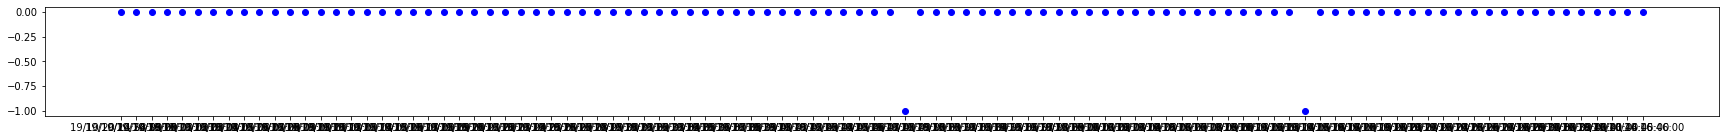

************************************************** Close - EMAV **************************************************


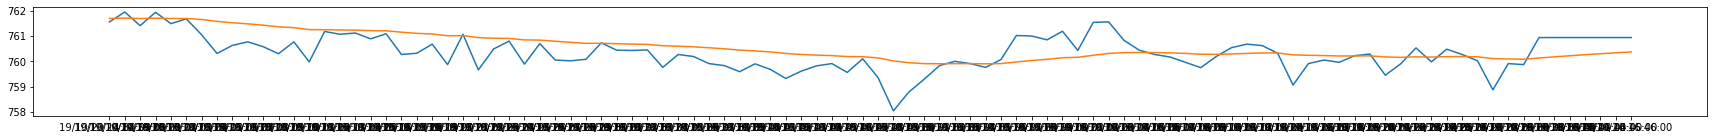

************************************************** MACD - signal **************************************************


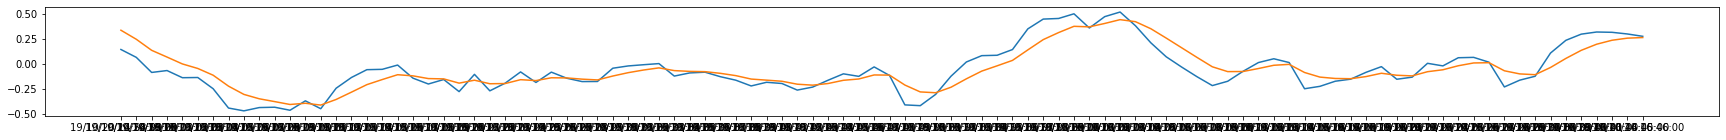

************************************************** RSI - EMAVRSI **************************************************


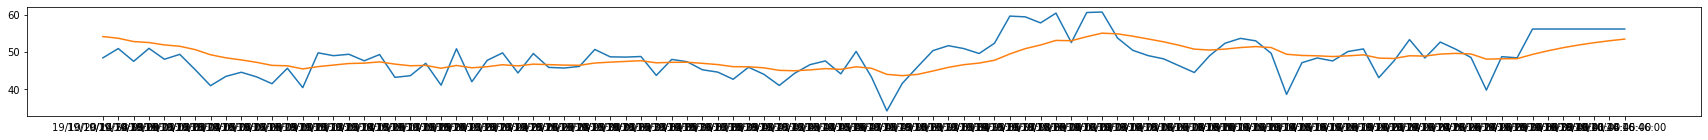

In [65]:
data_update = pd.read_excel("/content/drive/My Drive/Set50_20200821_20201019_1minute.xlsx",usecols =used_features)
data_update.set_index("Timestamp",inplace=True)
data_predict=RandomForest.predict(data_update)
data_update['signal_predict']=data_predict
plt.figure(figsize=(30,2))
plt.plot(data_update['signal_predict'].tail(100),'bo')
plt.show()
print("*"*50,"Close - EMAV","*"*50)
plt.figure(figsize=(30,2))
plt.plot(data_update['SET50.Close'].tail(100))
plt.plot(data_update['EMAV(34)'].tail(100))
plt.show()
print("*"*50,"MACD - signal","*"*50)
plt.figure(figsize=(30,2))
plt.plot(data_update['MACD(13,5,5)'].tail(100))
plt.plot(data_update['Signal'].tail(100))
plt.show()
plt.figure(figsize=(30,2))
print("*"*50,"RSI - EMAVRSI","*"*50)
plt.plot(data_update['RSI(14)'].tail(100))
plt.plot(data_update['EMAV(RSI,13)'].tail(100))
plt.show() 


In [66]:
data_update.tail(100)

,SET50.Close,EMAV(34),RSI(14),"MACD(13,5,5)",Signal,"EMAV(RSI,13)",signal_predict
Timestamp,,,,,,,
19/10/20 14:58:00,761.56,761.6943,48.5037,0.1418,0.3345,54.229,0
19/10/20 14:59:00,761.95,761.7089,50.9995,0.0630,0.2440,53.768,0
19/10/20 15:00:00,761.41,761.6918,47.5623,-0.0879,0.1334,52.881,0
19/10/20 15:01:00,761.94,761.7060,51.0494,-0.0690,0.0659,52.619,0
19/10/20 15:02:00,761.49,761.6937,48.1232,-0.1406,-0.0029,51.977,0
...,...,...,...,...,...,...,...
19/10/20 16:40:00,760.94,760.2202,56.2529,0.2953,0.1333,51.237,0
19/10/20 16:41:00,760.94,760.2613,56.2529,0.3166,0.1944,51.953,0
19/10/20 16:44:00,760.94,760.3001,56.2529,0.3136,0.2341,52.567,0


**ลองเทสซื้อขาย**

ข้อมูล **SET50Update **Set50_20200920_20201104_1minute ****

In [67]:
data_update2= pd.read_excel("/content/drive/My Drive/Set50_20200920_20201104_1minute.xlsx",usecols =used_features)
data_update2.set_index("Timestamp",inplace=True)
data_predict=RandomForest.predict(data_update2)
data_update2['signal_predict']=data_predict
start=3000
buy=0
sell=0
have=0
money=start
for index,row in data_update2.iterrows():
    if row['signal_predict'] == -1 and money>row['SET50.Close'] and have <1 :
      buy=buy+1
      money=money-row['SET50.Close']
      have=have+1
    if row['signal_predict'] == 1 and have != 0:
      sell=sell+1
      money=money+row['SET50.Close']
      have=have-1
print("butjet start : ",start)
print("Total buy stock : ",buy)
print("Total sell stock : ",sell)
print("have stock : ",have)
print("bugjet : ",money)
print("Profit :",money-start)

butjet start :  3000
Total buy stock :  20
Total sell stock :  19
have stock :  1
bugjet :  2257.159999999999
Profit : -742.840000000001


In [69]:
data_update2['pricebuy']=0
data_update2['pricesell']=0
data_update2['macdbuy']=0
data_update2['macdsell']=0
data_update2['rsibuy']=0
data_update2['rsisell']=0
data_update2['Alert']=0
data_update2=data_update2.astype(float)
status=0
for index,row in data_update2.iterrows():
  if status==0:
      if row['signal_predict']==1:
        status=1
        close=row['SET50.Close']
        buy=0
        pricebuy=close
        pricesell=0
        sell=0
        Alert=1
        macdbuy=row['MACD(13,5,5)']
        macdsell=0
        rsibuy=row['RSI(14)']
        rsisell=0
      elif row['signal_predict']==-1:
        status=-1
        close=row['SET50.Close']
        pricebuy=0
        pricesell=close
        buy=0
        sell=0
        Alert=-1
        macdbuy=0
        macdsell=row['MACD(13,5,5)']
        rsibuy=0
        rsisell=row['RSI(14)']
      else:
        status=0
        buy=0
        sell=0
        Alert=0
        pricebuy=0
        pricesell=0
        macdbuy=0
        macdsell=0
        rsibuy=0
        rsisell=0
  else :
    if status==1:
      if row['signal_predict']==1:
        status=1
        close=row['SET50.Close']
        buy=0
        pricebuy=close
        pricesell=0
        sell=0
        Alert=1
        macdbuy=row['MACD(13,5,5)']
        macdsell=0
        rsibuy=row['RSI(14)']
        rsisell=0
      elif row['signal_predict']==-1:
        status=-1
        sell=row['SET50.Close']-close
        close=row['SET50.Close']
        pricebuy=0
        pricesell=close
        buy=0
        Alert=-1
        macdbuy=0
        macdsell=row['MACD(13,5,5)']
        rsibuy=0
        rsisell=row['RSI(14)']
      else:
        buy=0
        sell=0
        Alert=0
        pricebuy=0
        pricesell=0
        macdbuy=0
        macdsell=0
        rsibuy=0
        rsisell=0
    elif status==-1:
       if row['signal_predict']==1:
        status=1
        buy=close-row['SET50.Close']
        close=row['SET50.Close']
        sell=0
        Alert=1
        pricebuy=close
        pricesell=0
        macdbuy=row['MACD(13,5,5)']
        macdsell=0
        rsibuy=row['RSI(14)']
        rsisell=0
       elif row['signal_predict']==-1:
        status=-1
        close=row['SET50.Close']
        pricebuy=0
        pricesell=close
        buy=0
        sell=0
        Alert=-1
        macdbuy=0
        macdsell=row['MACD(13,5,5)']
        rsibuy=0
        rsisell=row['RSI(14)']
       else:
        buy=0
        sell=0
        Alert=0
        pricebuy=0
        pricesell=0
        macdbuy=0
        macdsell=0
        rsibuy=0
        rsisell=0
    else:
      buy=0
      sell=0
      price=0
      pricebuy=0
      pricesell=0
      macdbuy=0
      macdsell=0
      rsibuy=0
      rsisell=0
  data_update2.at[index,'Alert']=Alert
  data_update2.at[index,'pricebuy']=pricebuy
  data_update2.at[index,'pricesell']=pricesell
  data_update2.at[index,'macdbuy']=macdbuy
  data_update2.at[index,'macdsell']=macdsell
  data_update2.at[index,'rsibuy']=rsibuy
  data_update2.at[index,'rsisell']=rsisell

In [70]:
data_update2=data_update2.astype(float)
data_update2.head()

,SET50.Close,EMAV(34),RSI(14),"MACD(13,5,5)",Signal,"EMAV(RSI,13)",signal_predict,pricebuy,pricesell,macdbuy,macdsell,rsibuy,rsisell,Alert
Timestamp,,,,,,,,,,,,,,
20/10/20 09:58:00,759.03,760.2945,38.7735,-0.1170,0.1351,51.435,-1.0,0.0,759.03,0.0,-0.117,0.0,38.7735,-1.0
20/10/20 09:59:00,760.00,760.2777,47.6671,-0.1497,0.0402,50.897,0.0,0.0,0.00,0.0,0.000,0.0,0.0000,0.0
20/10/20 10:00:00,761.80,760.3646,59.4408,0.1816,0.0873,52.117,0.0,0.0,0.00,0.0,0.000,0.0,0.0000,0.0
20/10/20 10:01:00,762.43,760.4827,62.6114,0.4823,0.2190,53.616,0.0,0.0,0.00,0.0,0.000,0.0,0.0000,0.0
20/10/20 10:02:00,762.44,760.5945,62.6613,0.6330,0.3570,54.909,0.0,0.0,0.00,0.0,0.000,0.0,0.0000,0.0


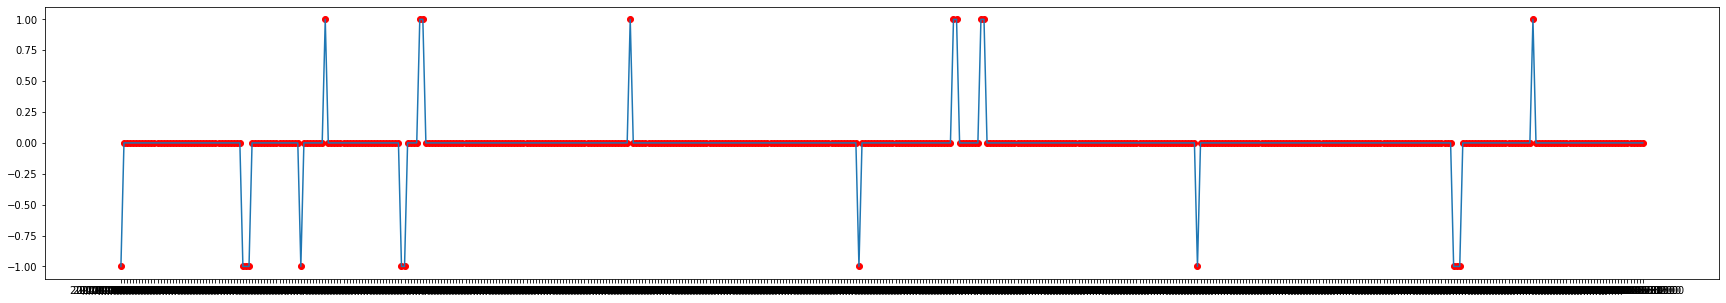

************************************************** Close - EMAV **************************************************


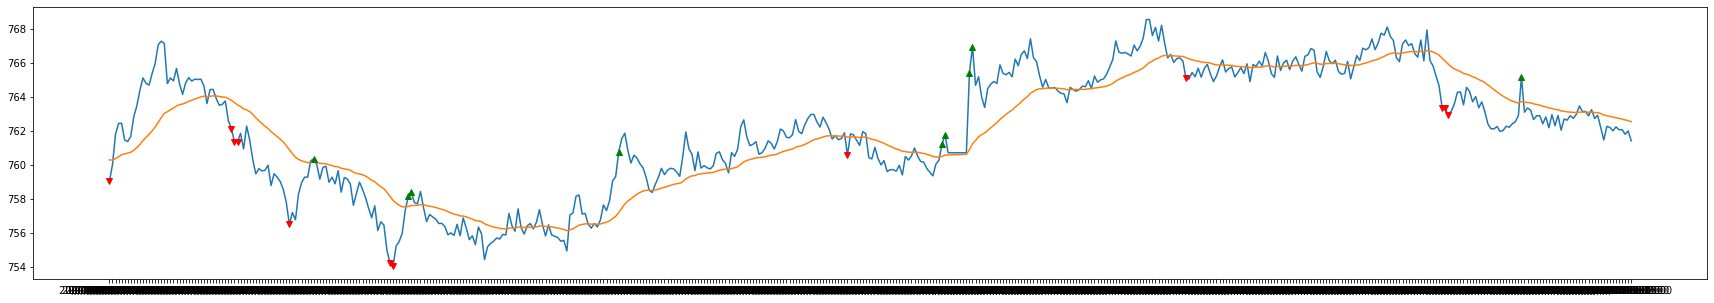

************************************************** MACD - signal **************************************************


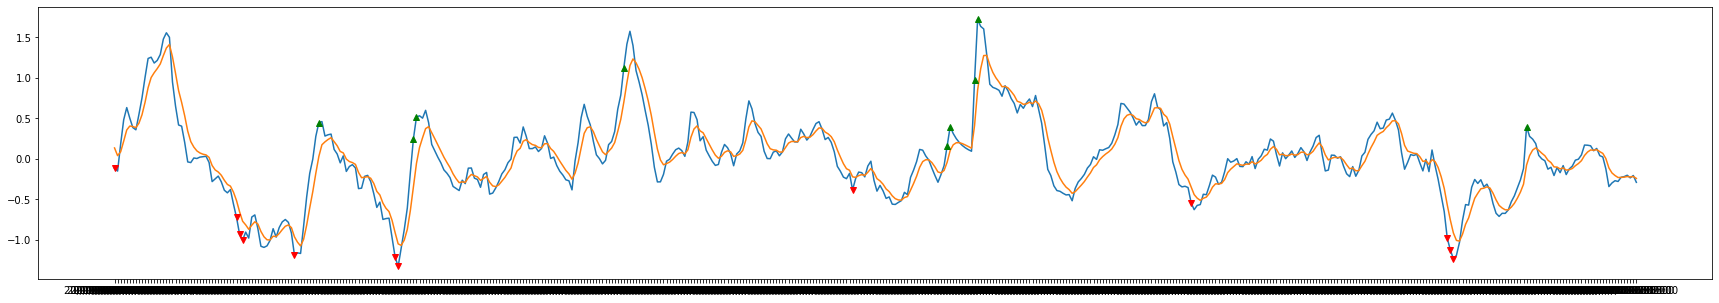

************************************************** RSI - EMAVRSI **************************************************


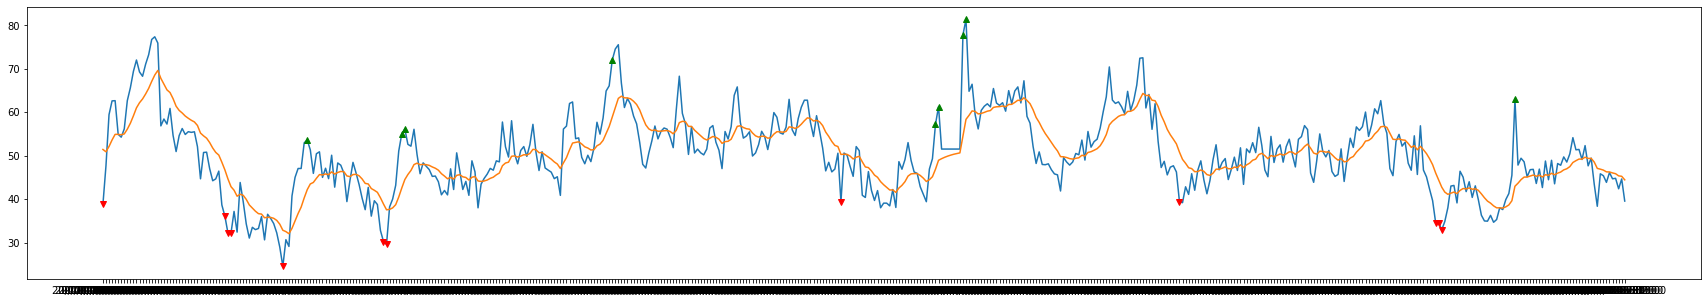

In [71]:
plt.figure(figsize=(30,5))
plt.plot(data_update2['signal_predict'].head(500),'ro')
plt.plot(data_update2['Alert'].head(500))
plt.show()
print("*"*50,"Close - EMAV","*"*50)
plt.figure(figsize=(30,5))
data_update2['pricebuy'].replace(0, np.nan, inplace=True)
data_update2['pricesell'].replace(0, np.nan, inplace=True)
plt.plot(data_update2['SET50.Close'].head(500))
plt.plot(data_update2['EMAV(34)'].head(500))
plt.plot(data_update2['pricebuy'].head(500),'g^')
plt.plot(data_update2['pricesell'].head(500),'rv')
plt.show()
print("*"*50,"MACD - signal","*"*50)
data_update2['macdbuy'].replace(0, np.nan, inplace=True)
data_update2['macdsell'].replace(0, np.nan, inplace=True)
plt.figure(figsize=(30,5))
plt.plot(data_update2['MACD(13,5,5)'].head(500))
plt.plot(data_update2['Signal'].head(500))
plt.plot(data_update2['macdbuy'].head(500),'g^')
plt.plot(data_update2['macdsell'].head(500),'rv')
plt.show()
plt.figure(figsize=(30,5))
print("*"*50,"RSI - EMAVRSI","*"*50)
data_update2['rsibuy'].replace(0, np.nan, inplace=True)
data_update2['rsisell'].replace(0, np.nan, inplace=True)
plt.plot(data_update2['RSI(14)'].head(500))
plt.plot(data_update2['EMAV(RSI,13)'].head(500))
plt.plot(data_update2['rsibuy'].head(500),'g^')
plt.plot(data_update2['rsisell'].head(500),'rv')
plt.show() 
